# Imports needed

In [1]:
# NumPy brings the computational power of languages like C and Fortran to Python
import numpy as np

# Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool
import pandas as pd

# Print all the outputs
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"

# Generates profile reports from a pandas DataFrame.
from pandas_profiling import ProfileReport

# Function files created by us
import functions as fn

# Helps to show multiple plots in the same field
%matplotlib inline

# Get database

In [2]:
# We use the cd command to move through our directories
%cd ..

C:\Users\Agus\Documents\GitHub\JAL-repo


In [3]:
# The read_excel() function allows us to import an excel and convert it into a pandas database
data = pd.read_excel("Data/creditcardmarketing.xlsx")

# EDA

## General analysis of the database with a report
We use this report to get a general idea of the database

In [4]:
# Create a report with the details of the data in addition to graphs to better understand
profile = ProfileReport(data, title="Bank Profiling Report", explorative=True)

In [5]:
# Shows the report inside field
#profile

# Shows the report created in the form of windows
#profile.to_widgets()

In [6]:
# export Report to html
#profile.to_file(output_file="Bank data profiling.html")

## Basic database analysis
We start to analyze the database to understand it better

### Visualizations

In [7]:
#Show all our database
data

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,17999,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


We can see how the data has been loaded correctly

In [8]:
#It shows us the size of our database (rows,columns)
data.shape

(18000, 17)

We have 17 columns and 18000 rows

In [9]:
# The info() function print a concise summary of a DataFrame.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       18000 non-null  int64  
 1   Offer Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer Type           18000 non-null  object 
 4   Income Level          18000 non-null  object 
 5   # Bank Accounts Open  18000 non-null  int64  
 6   Overdraft Protection  18000 non-null  object 
 7   Credit Rating         18000 non-null  object 
 8   # Credit Cards Held   18000 non-null  int64  
 9   # Homes Owned         18000 non-null  int64  
 10  Household Size        18000 non-null  int64  
 11  Own Your Home         18000 non-null  object 
 12  Average Balance       17976 non-null  float64
 13  Q1 Balance            17976 non-null  float64
 14  Q2 Balance            17976 non-null  float64
 15  Q3 Balance         

At first glance we can see:
- There are some null values
- Some headers are not properly formatted
- We have 3 different types of column formats, although they seem adequate to your description
- We will deal with these problems later

In [10]:
# The Head() function return the first n rows of a DataFrame
data.head(1)

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0


In [11]:
# The describe() function generate descriptive statistics of a DataFrame.
data.describe()

,Customer Number,# Bank Accounts Open,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,9000.500000,1.255778,1.903500,1.203444,3.499056,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,0.472501,0.797009,0.427341,1.114182,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,13500.250000,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


Everything seems to be within normality

In [12]:
# The duplicated() function return boolean Series denoting duplicate rows of a DataFrame
data.duplicated().value_counts()

False    18000
dtype: int64

No duplicate rows

In [13]:
# The dtypes() function return the dtypes in the DataFrame
data.dtypes

Customer Number           int64
Offer Accepted           object
Reward                   object
Mailer Type              object
Income Level             object
# Bank Accounts Open      int64
Overdraft Protection     object
Credit Rating            object
# Credit Cards Held       int64
# Homes Owned             int64
Household Size            int64
Own Your Home            object
Average Balance         float64
Q1 Balance              float64
Q2 Balance              float64
Q3 Balance              float64
Q4 Balance              float64
dtype: object

Customer Number
1        1
11999    1
12005    1
12004    1
12003    1
        ..
6006     1
6007     1
6008     1
6009     1
18000    1
Name: Customer Number, Length: 18000, dtype: int64


Offer Accepted
No     16977
Yes     1023
Name: Offer Accepted, dtype: int64


Reward
Air Miles    6061
Cash Back    5999
Points       5940
Name: Reward, dtype: int64


Mailer Type
Postcard    9147
Letter      8853
Name: Mailer Type, dtype: int64


Income Level
Medium    9013
High      4526
Low       4461
Name: Income Level, dtype: int64


# Bank Accounts Open
1    13692
2     4012
3      296
Name: # Bank Accounts Open, dtype: int64


Overdraft Protection
No     15322
Yes     2678
Name: Overdraft Protection, dtype: int64


Credit Rating
High      6071
Medium    5972
Low       5957
Name: Credit Rating, dtype: int64


# Credit Cards Held
2    7944
1    6154
3    3387
4     515
Name: # Credit Cards Held, dtype: int64


# Homes Owned
1    14523
2     3292
3      185
Name: # Homes Owned, dtype: int64


Ho

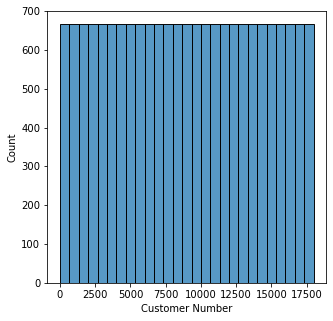

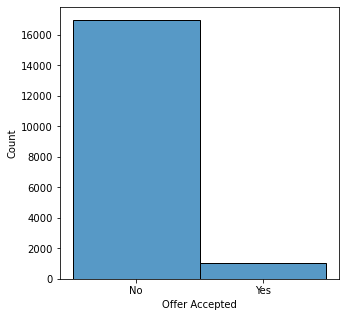

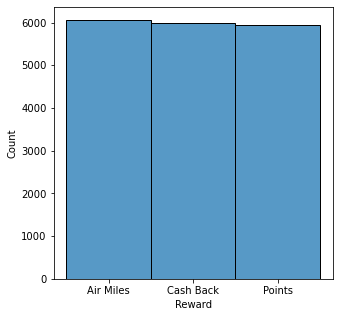

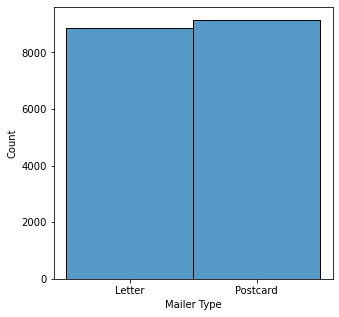

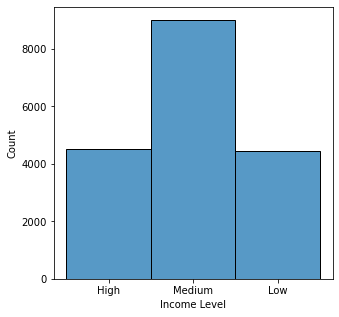

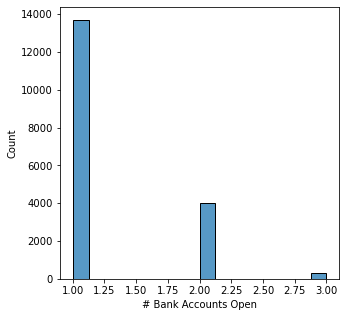

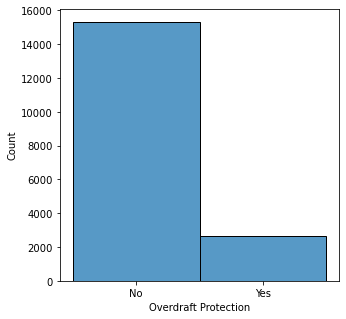

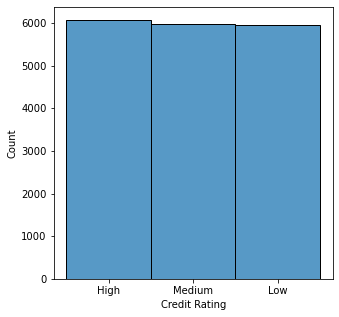

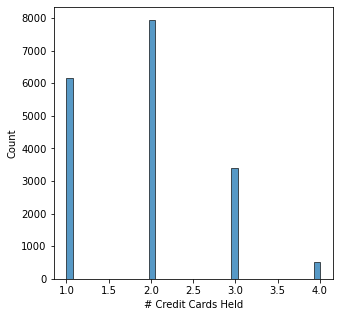

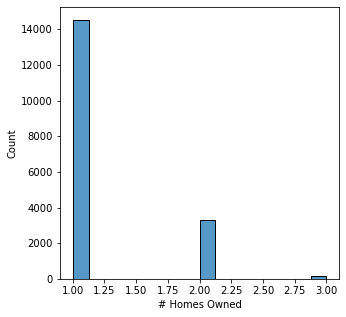

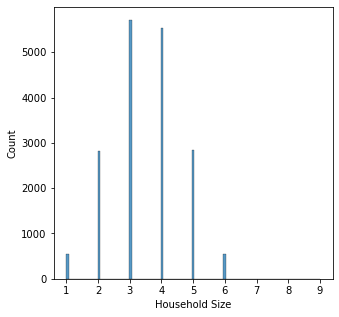

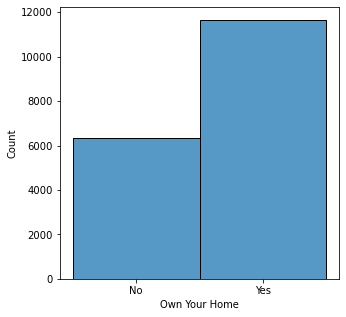

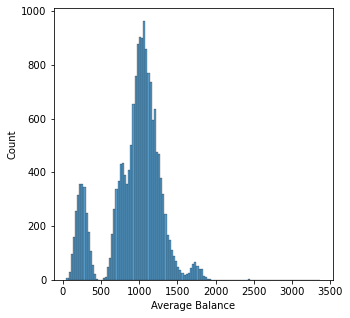

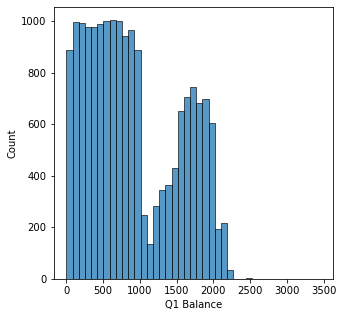

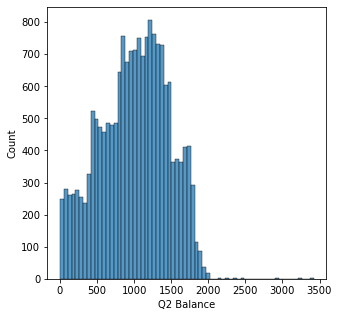

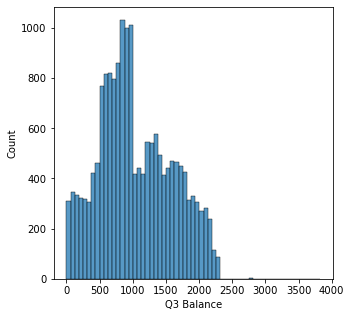

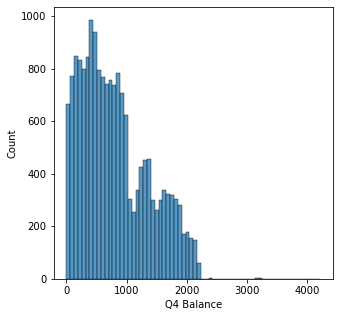

In [14]:
# This is one of our functions that returns all values_counts() and their histograms
# You can see the more detailed information in the functions.py file
fn.show_values(data)

We can see how our data is unbalanced

### Deal with nulls

In [15]:
# The isnull() function detect missing values
# we use sum() funtion to see the values grouped by columns
data.isnull().sum()

Customer Number          0
Offer Accepted           0
Reward                   0
Mailer Type              0
Income Level             0
# Bank Accounts Open     0
Overdraft Protection     0
Credit Rating            0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Own Your Home            0
Average Balance         24
Q1 Balance              24
Q2 Balance              24
Q3 Balance              24
Q4 Balance              24
dtype: int64

In [16]:
# As there are only 24 rows within the 18000 we have decided to dispense with those values
# To drop any rows that contain any null values
data.dropna(inplace=True)

In [17]:
# Show the result
data.isnull().sum()

Customer Number         0
Offer Accepted          0
Reward                  0
Mailer Type             0
Income Level            0
# Bank Accounts Open    0
Overdraft Protection    0
Credit Rating           0
# Credit Cards Held     0
# Homes Owned           0
Household Size          0
Own Your Home           0
Average Balance         0
Q1 Balance              0
Q2 Balance              0
Q3 Balance              0
Q4 Balance              0
dtype: int64

### Deal with headers

In [18]:
# The Head() function return the first n rows of a DataFrame
data.head(5)

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [19]:
# Using str.replace() to normalize the headers,we eliminate the symbols and spaces
data.columns = data.columns.str.replace('[#, ]', '')

C:\Users\Agus\AppData\Local\Temp/ipykernel_9344/1119041155.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.replace('[#, ]', '')


In [20]:
# We show the result
data.head(5)

,CustomerNumber,OfferAccepted,Reward,MailerType,IncomeLevel,BankAccountsOpen,OverdraftProtection,CreditRating,CreditCardsHeld,HomesOwned,HouseholdSize,OwnYourHome,AverageBalance,Q1Balance,Q2Balance,Q3Balance,Q4Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


### Deal with Outliers

In [21]:
#we have decided to remove these two conditions because there is only one of each among 18000 rows
data = data.drop(data[data['HouseholdSize']==8].index)
data = data.drop(data[data['HouseholdSize']==9].index)

### First conclusions
Let's make a first compilation of what we have learned so far about our database
- Only 1,021 of 18,000 have accepted the offer, that's 5.67% of the total
- There are three types of Reward and they are distributed with about 6000, thats 33% per each
- There are two types of MailerType and they are distributed with about 9000, that's 50% for each
- There are three types of IncomeLevel but -medium- stands out from the others by doubling them
- The great majority of clients only have 1 bank account with a total of 13674, thats 75.96%
- The great majority of clients dont have OverdraftProtectiont with a total of 15300, thats 85%
- There are three types of CreditRating and they are distributed with about 6000, thats 33% per each
- There are four types of CreditCardsHeld, most have 1 or 2 with the 78%
- There are three types of HomesOwned, most have 1 with 80.56%
- There are 9 types of HouseholdSize, 3, 4, 5, 2 contain a 94.01%
- 64.64% of the clients have their own house
- The average salary of the clients is 940.51

## Analyzing the database in depth

### Correlacion Matrix

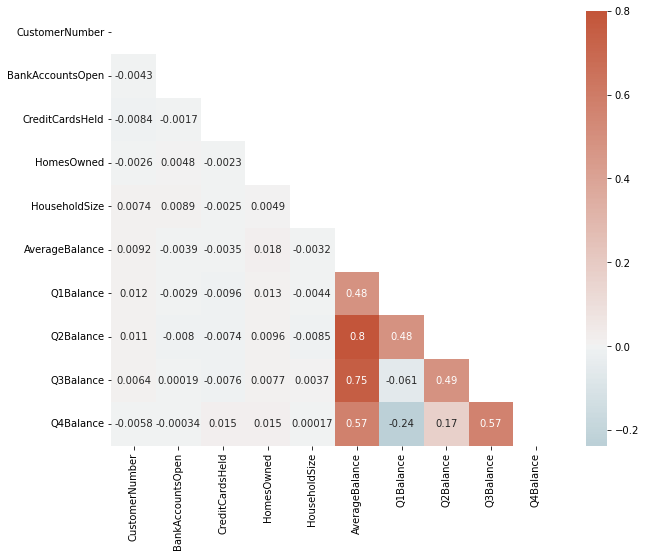

In [22]:
fn.matrix_correlation (data)

# Training

## Select target

In [23]:
y = data['OfferAccepted']
X = X=data.drop(['OfferAccepted','CustomerNumber','Q1Balance','Q2Balance','Q3Balance','Q4Balance'],axis=1)

In [24]:
X_num=X.select_dtypes(include=np.number)
X_cat =X.select_dtypes(include=object)

X_num.shape
X_cat.shape
y.shape

(17974, 5)

(17974, 6)

(17974,)

## Regresion Model without numeric scalers

In [25]:
X_cat_dummies=pd.get_dummies(X_cat, drop_first=True)
X_cat_dummies

,Reward_Cash Back,Reward_Points,MailerType_Postcard,IncomeLevel_Low,IncomeLevel_Medium,OverdraftProtection_Yes,CreditRating_Low,CreditRating_Medium,OwnYourHome_Yes
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,1,1
2,0,0,1,0,0,0,0,1,1
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
17995,1,0,0,0,0,0,1,0,1
17996,1,0,0,0,0,0,1,0,1
17997,1,0,0,0,0,0,1,0,0
17998,1,0,0,0,1,0,0,1,1


In [26]:
X_full = pd.concat([X_num,X_cat_dummies], axis=1)

In [27]:
X_full

,BankAccountsOpen,CreditCardsHeld,HomesOwned,HouseholdSize,AverageBalance,Reward_Cash Back,Reward_Points,MailerType_Postcard,IncomeLevel_Low,IncomeLevel_Medium,OverdraftProtection_Yes,CreditRating_Low,CreditRating_Medium,OwnYourHome_Yes
0,1,2,1,4,1160.75,0,0,0,0,0,0,0,0,0
1,1,2,2,5,147.25,0,0,0,0,1,0,0,1,1
2,2,2,1,2,276.50,0,0,1,0,0,0,0,1,1
3,2,1,1,4,1219.00,0,0,0,0,1,0,0,0,0
4,1,2,1,6,1211.00,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,1,1,1,5,167.50,1,0,0,0,0,0,1,0,1
17996,1,3,1,3,850.50,1,0,0,0,0,0,1,0,1
17997,1,2,1,4,1087.25,1,0,0,0,0,0,1,0,0
17998,1,4,2,2,1022.25,1,0,0,0,1,0,0,1,1


Accuracy of LogisticRegresion: 0.9417763767847209


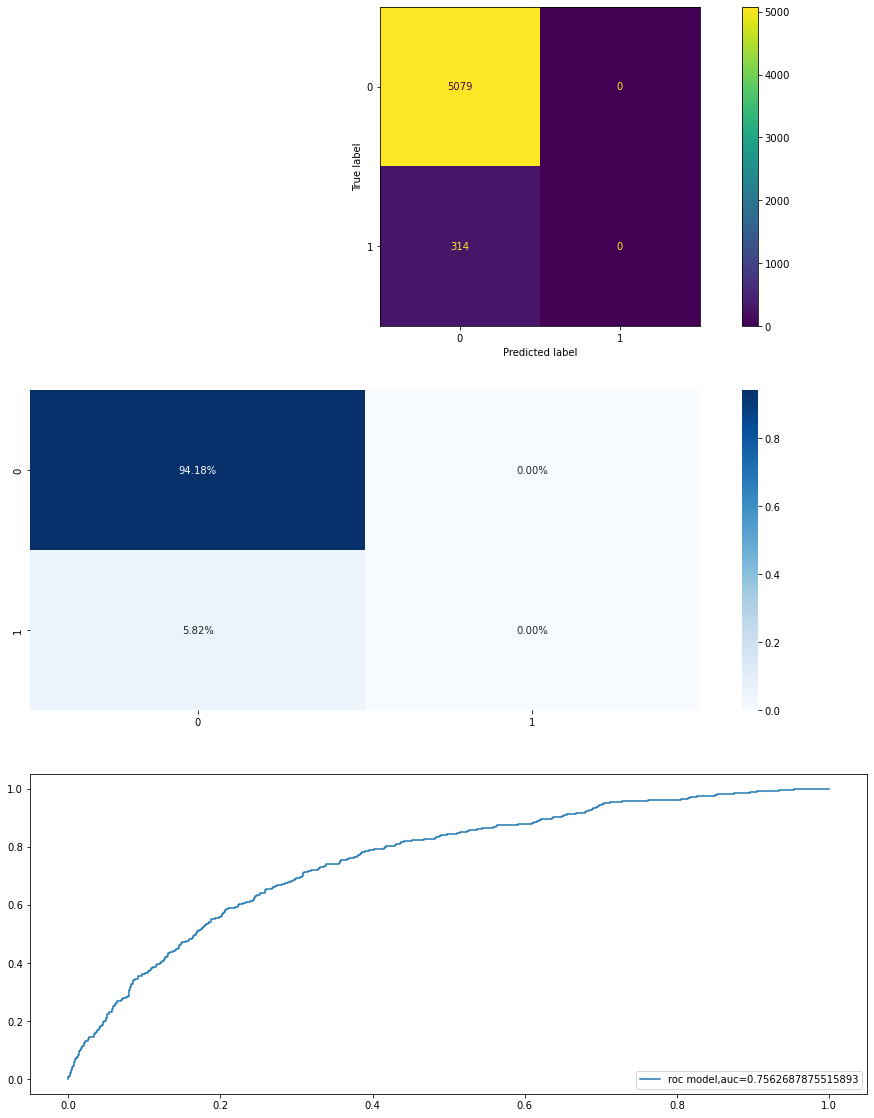

In [28]:
accuracy = fn.logistic_regresion_train(X_full,y,1)

## test

In [29]:
x0 = fn.maxmin_scaler (X_num)
x1 = fn.abs_scaler (X_num)
x2 = fn.st_scaler (X_num)
x3 = fn.rob_scaler (X_num)
x4 = fn.nor_scaler (X_num)
x5 = fn.trans_sclaer (X_num)
x6 = fn.pow_scaler (X_num)

In [30]:
X0 = pd.concat([x0,X_cat_dummies], axis=1)
X1 = pd.concat([x1,X_cat_dummies], axis=1)
X2 = pd.concat([x2,X_cat_dummies], axis=1)
X3 = pd.concat([x3,X_cat_dummies], axis=1)
X4 = pd.concat([x4,X_cat_dummies], axis=1)
X5 = pd.concat([x5,X_cat_dummies], axis=1)
X6 = pd.concat([x6,X_cat_dummies], axis=1)

In [31]:
x0
X0
x6
X6

,BankAccountsOpen,CreditCardsHeld,HomesOwned,HouseholdSize,AverageBalance
0,0.0,0.333333,0.0,0.6,0.335292
1,0.0,0.333333,0.5,0.8,0.029837
2,0.5,0.333333,0.0,0.2,0.068791
3,0.5,0.000000,0.0,0.6,0.352848
4,0.0,0.333333,0.0,1.0,0.350437
...,...,...,...,...,...
17995,0.0,0.000000,0.0,0.8,0.035940
17996,0.0,0.666667,0.0,0.4,0.241787
17997,0.0,0.333333,0.0,0.6,0.313140
17998,0.0,1.000000,0.5,0.2,0.293550


,BankAccountsOpen,CreditCardsHeld,HomesOwned,HouseholdSize,AverageBalance,Reward_Cash Back,Reward_Points,MailerType_Postcard,IncomeLevel_Low,IncomeLevel_Medium,OverdraftProtection_Yes,CreditRating_Low,CreditRating_Medium,OwnYourHome_Yes
0,0.0,0.333333,0.0,0.6,0.335292,0,0,0,0,0,0,0,0,0
1,0.0,0.333333,0.5,0.8,0.029837,0,0,0,0,1,0,0,1,1
2,0.5,0.333333,0.0,0.2,0.068791,0,0,1,0,0,0,0,1,1
3,0.5,0.000000,0.0,0.6,0.352848,0,0,0,0,1,0,0,0,0
4,0.0,0.333333,0.0,1.0,0.350437,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,0.0,0.000000,0.0,0.8,0.035940,1,0,0,0,0,0,1,0,1
17996,0.0,0.666667,0.0,0.4,0.241787,1,0,0,0,0,0,1,0,1
17997,0.0,0.333333,0.0,0.6,0.313140,1,0,0,0,0,0,1,0,0
17998,0.0,1.000000,0.5,0.2,0.293550,1,0,0,0,1,0,0,1,1


,BankAccountsOpen,CreditCardsHeld,HomesOwned,HouseholdSize,AverageBalance
0,-0.560928,0.275603,-0.489387,0.456576,0.616721
1,-0.560928,0.275603,2.042280,1.340803,-2.027610
2,1.778543,0.275603,-0.489387,-1.352126,-1.788531
3,1.778543,-1.242625,-0.489387,0.456576,0.806361
4,-0.560928,0.275603,-0.489387,2.214940,0.780137
...,...,...,...,...,...
17995,-0.560928,-1.242625,-0.489387,1.340803,-1.993486
17996,-0.560928,1.297904,-0.489387,-0.439942,-0.338604
17997,-0.560928,0.275603,-0.489387,0.456576,0.381840
17998,-0.560928,2.060895,2.042280,-1.352126,0.178384


,BankAccountsOpen,CreditCardsHeld,HomesOwned,HouseholdSize,AverageBalance,Reward_Cash Back,Reward_Points,MailerType_Postcard,IncomeLevel_Low,IncomeLevel_Medium,OverdraftProtection_Yes,CreditRating_Low,CreditRating_Medium,OwnYourHome_Yes
0,-0.560928,0.275603,-0.489387,0.456576,0.616721,0,0,0,0,0,0,0,0,0
1,-0.560928,0.275603,2.042280,1.340803,-2.027610,0,0,0,0,1,0,0,1,1
2,1.778543,0.275603,-0.489387,-1.352126,-1.788531,0,0,1,0,0,0,0,1,1
3,1.778543,-1.242625,-0.489387,0.456576,0.806361,0,0,0,0,1,0,0,0,0
4,-0.560928,0.275603,-0.489387,2.214940,0.780137,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,-0.560928,-1.242625,-0.489387,1.340803,-1.993486,1,0,0,0,0,0,1,0,1
17996,-0.560928,1.297904,-0.489387,-0.439942,-0.338604,1,0,0,0,0,0,1,0,1
17997,-0.560928,0.275603,-0.489387,0.456576,0.381840,1,0,0,0,0,0,1,0,0
17998,-0.560928,2.060895,2.042280,-1.352126,0.178384,1,0,0,0,1,0,0,1,1


In [33]:
fn.logistic_regresion_train_test (X0,y)
fn.logistic_regresion_train_test (X1,y)
fn.logistic_regresion_train_test (X2,y)
fn.logistic_regresion_train_test (X3,y)
fn.logistic_regresion_train_test (X4,y)
fn.logistic_regresion_train_test (X5,y)
fn.logistic_regresion_train_test (X6,y)

Accuracy of LogisticRegresion: 0.9417763767847209
Accuracy of LogisticRegresion: 0.9417763767847209
Accuracy of LogisticRegresion: 0.9417763767847209
Accuracy of LogisticRegresion: 0.9417763767847209
Accuracy of LogisticRegresion: 0.9417763767847209
Accuracy of LogisticRegresion: 0.9417763767847209
Accuracy of LogisticRegresion: 0.9417763767847209


In [39]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
#split our data
X_train,X_test,y_train,y_test=train_test_split(X3,y,test_size=0.30,random_state=40)
#apply and train logistic regresion
model=LogisticRegression(max_iter=500)
model.fit(X_train,y_train)
#calculate accuracy
y_test_pred=model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy of LogisticRegresion:",accuracy)

LogisticRegression(max_iter=500)

Accuracy of LogisticRegresion: 0.9417763767847209


## Regresion Model with numeric scalers

In [28]:
scalers = fn.all_scalers(X_num)
X_full = []
for i in range(len(scalers)):
    X_full.append(pd.concat([X_cat_dummies,scalers[i]], axis=1))



In [32]:
X_full[6].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17974 entries, 0 to 17999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Reward_Cash Back         17974 non-null  uint8  
 1   Reward_Points            17974 non-null  uint8  
 2   MailerType_Postcard      17974 non-null  uint8  
 3   IncomeLevel_Low          17974 non-null  uint8  
 4   IncomeLevel_Medium       17974 non-null  uint8  
 5   OverdraftProtection_Yes  17974 non-null  uint8  
 6   CreditRating_Low         17974 non-null  uint8  
 7   CreditRating_Medium      17974 non-null  uint8  
 8   OwnYourHome_Yes          17974 non-null  uint8  
 9   BankAccountsOpen         17974 non-null  float64
 10  CreditCardsHeld          17974 non-null  float64
 11  HomesOwned               17974 non-null  float64
 12  HouseholdSize            17974 non-null  float64
 13  AverageBalance           17974 non-null  float64
dtypes: float64(5), uint8(9

Numerical values sampled with: MinMaxScaler
       Reward_Cash Back  Reward_Points  MailerType_Postcard  IncomeLevel_Low  \
0                     0              0                    0                0   
1                     0              0                    0                0   
2                     0              0                    1                0   
3                     0              0                    0                0   
4                     0              0                    0                0   
...                 ...            ...                  ...              ...   
17995                 1              0                    0                0   
17996                 1              0                    0                0   
17997                 1              0                    0                0   
17998                 1              0                    0                0   
17999                 1              0                    0                1

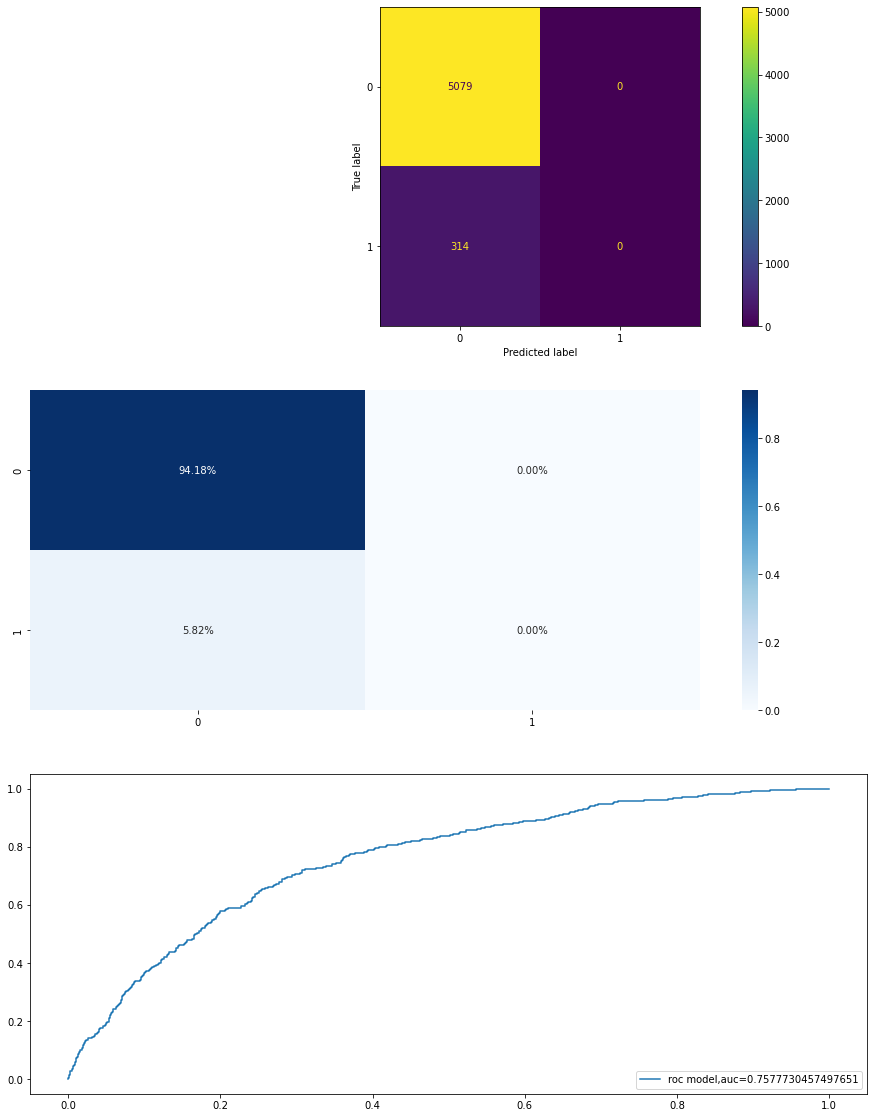


Numerical values sampled with: MaxAbsScaler
       Reward_Cash Back  Reward_Points  MailerType_Postcard  IncomeLevel_Low  \
0                     0              0                    0                0   
1                     0              0                    0                0   
2                     0              0                    1                0   
3                     0              0                    0                0   
4                     0              0                    0                0   
...                 ...            ...                  ...              ...   
17995                 1              0                    0                0   
17996                 1              0                    0                0   
17997                 1              0                    0                0   
17998                 1              0                    0                0   
17999                 1              0                    0                

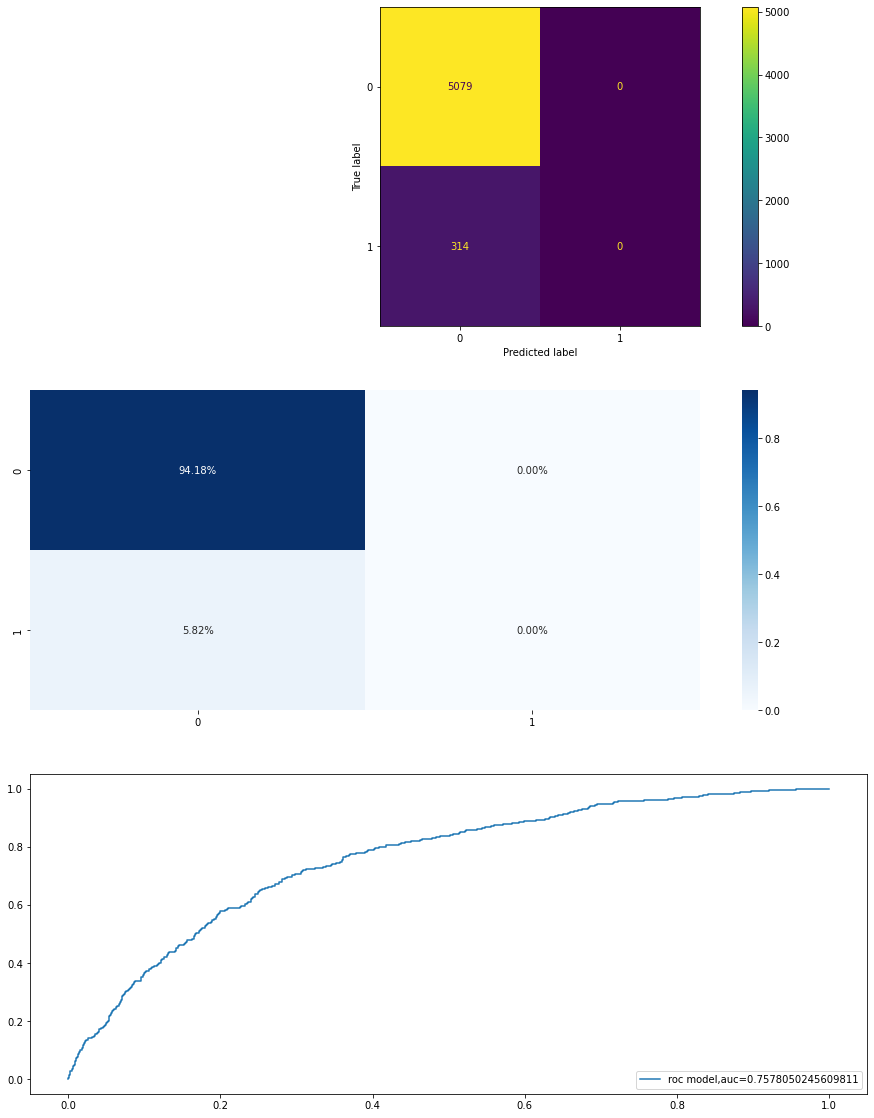


Numerical values sampled with: StandardScaler
       Reward_Cash Back  Reward_Points  MailerType_Postcard  IncomeLevel_Low  \
0                     0              0                    0                0   
1                     0              0                    0                0   
2                     0              0                    1                0   
3                     0              0                    0                0   
4                     0              0                    0                0   
...                 ...            ...                  ...              ...   
17995                 1              0                    0                0   
17996                 1              0                    0                0   
17997                 1              0                    0                0   
17998                 1              0                    0                0   
17999                 1              0                    0              

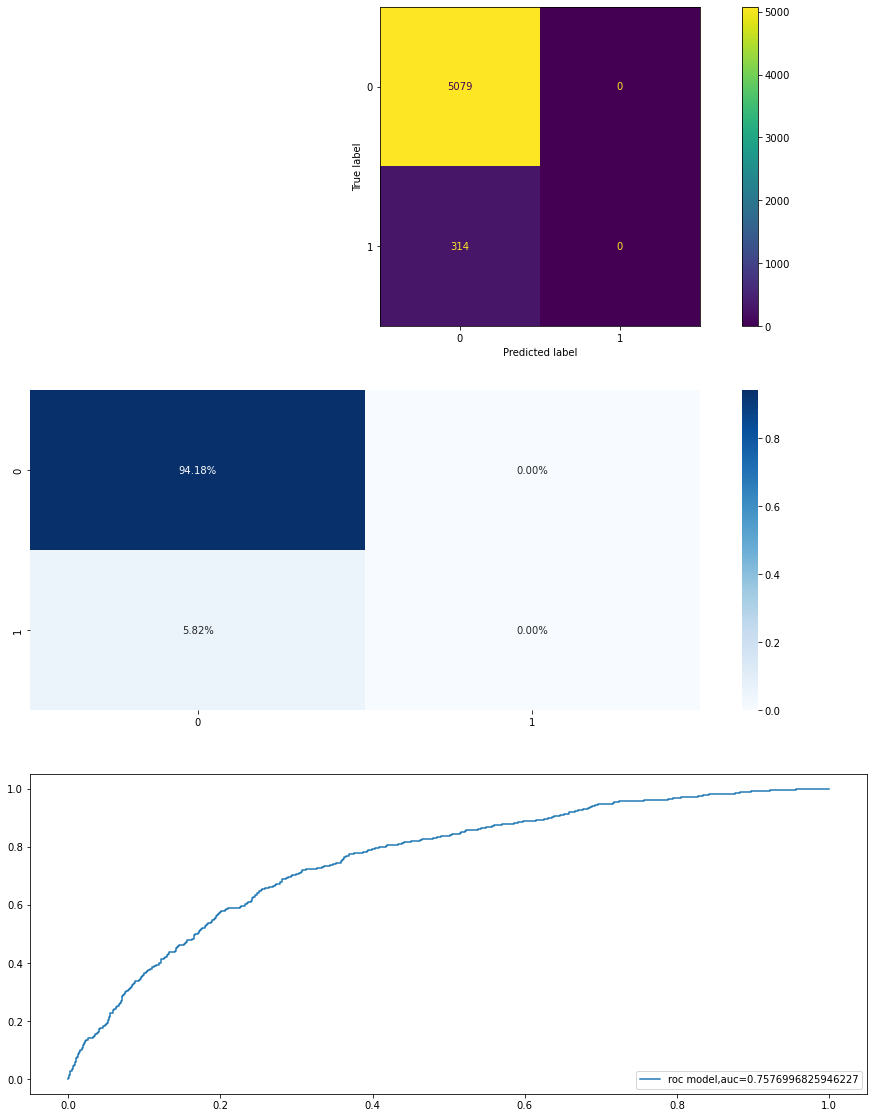


Numerical values sampled with: RobustScaler
       Reward_Cash Back  Reward_Points  MailerType_Postcard  IncomeLevel_Low  \
0                     0              0                    0                0   
1                     0              0                    0                0   
2                     0              0                    1                0   
3                     0              0                    0                0   
4                     0              0                    0                0   
...                 ...            ...                  ...              ...   
17995                 1              0                    0                0   
17996                 1              0                    0                0   
17997                 1              0                    0                0   
17998                 1              0                    0                0   
17999                 1              0                    0                

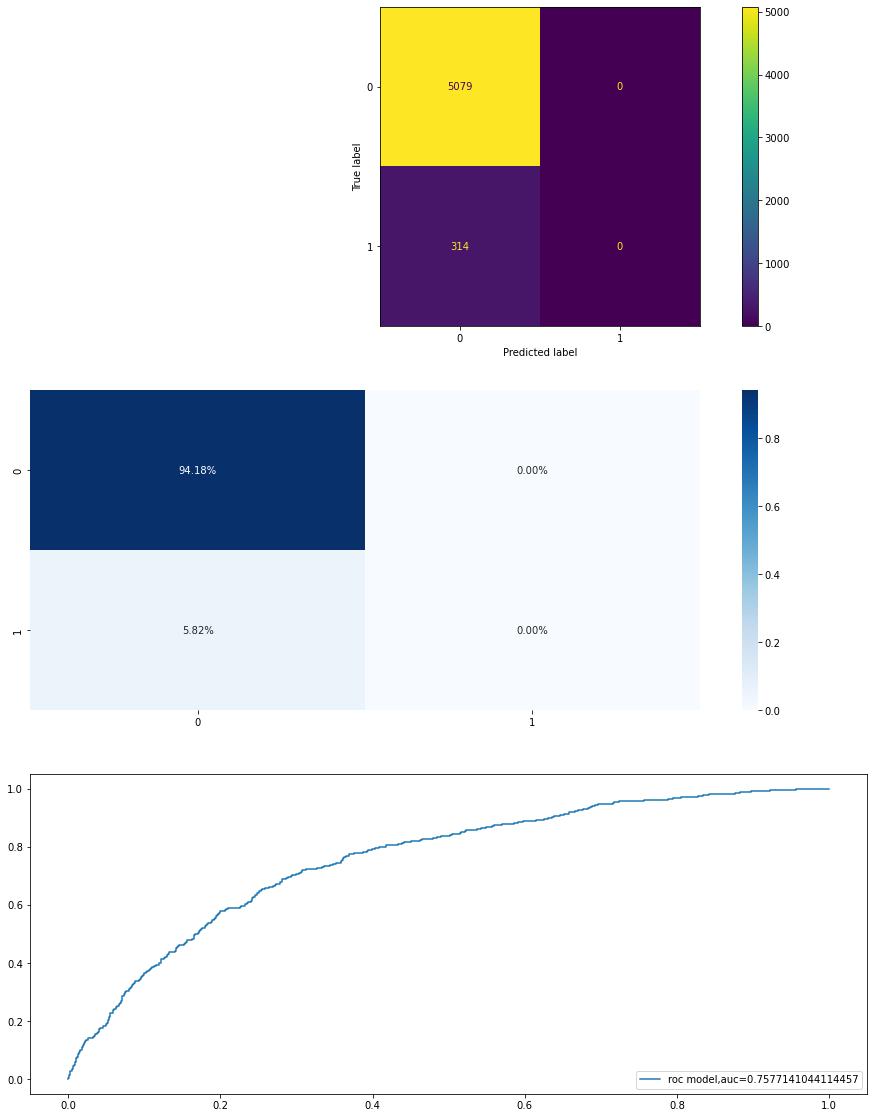


Numerical values sampled with: Normalizer
       Reward_Cash Back  Reward_Points  MailerType_Postcard  IncomeLevel_Low  \
0                     0              0                    0                0   
1                     0              0                    0                0   
2                     0              0                    1                0   
3                     0              0                    0                0   
4                     0              0                    0                0   
...                 ...            ...                  ...              ...   
17995                 1              0                    0                0   
17996                 1              0                    0                0   
17997                 1              0                    0                0   
17998                 1              0                    0                0   
17999                 1              0                    0                1 

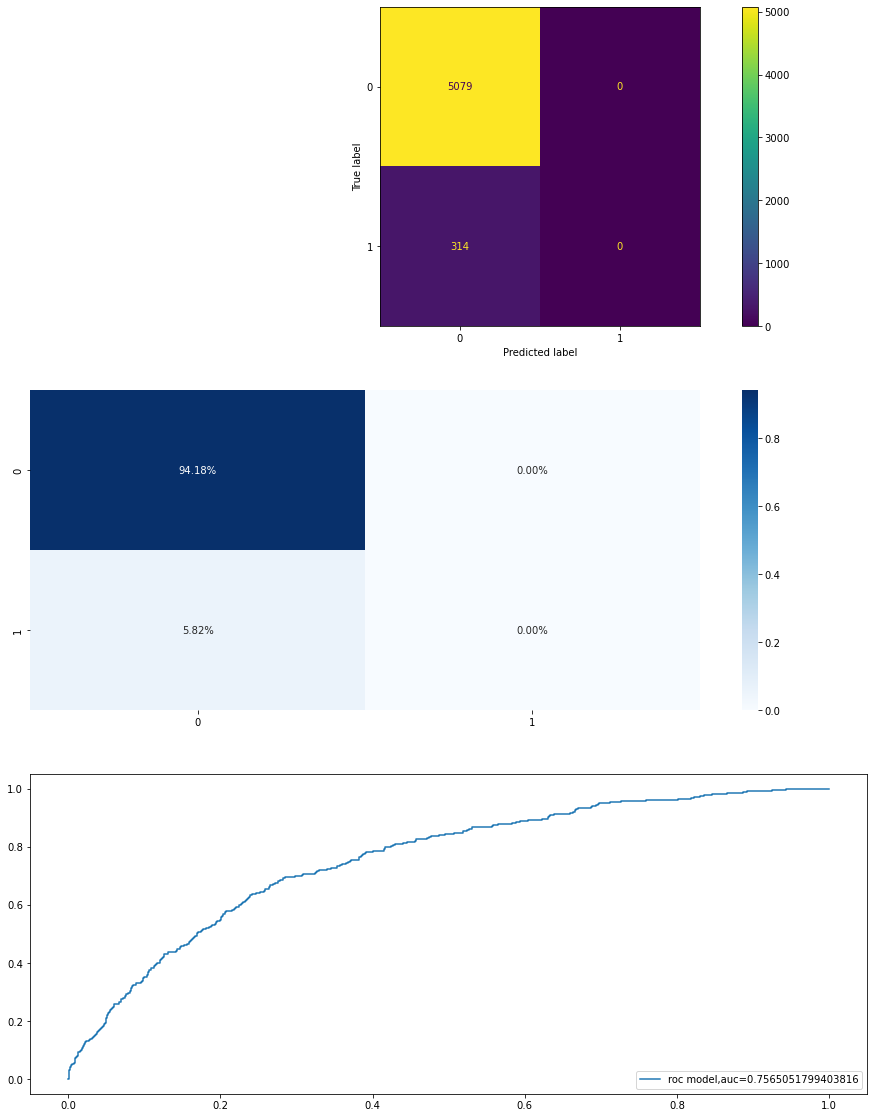


Numerical values sampled with: QuantileTransformer
       Reward_Cash Back  Reward_Points  MailerType_Postcard  IncomeLevel_Low  \
0                     0              0                    0                0   
1                     0              0                    0                0   
2                     0              0                    1                0   
3                     0              0                    0                0   
4                     0              0                    0                0   
...                 ...            ...                  ...              ...   
17995                 1              0                    0                0   
17996                 1              0                    0                0   
17997                 1              0                    0                0   
17998                 1              0                    0                0   
17999                 1              0                    0         

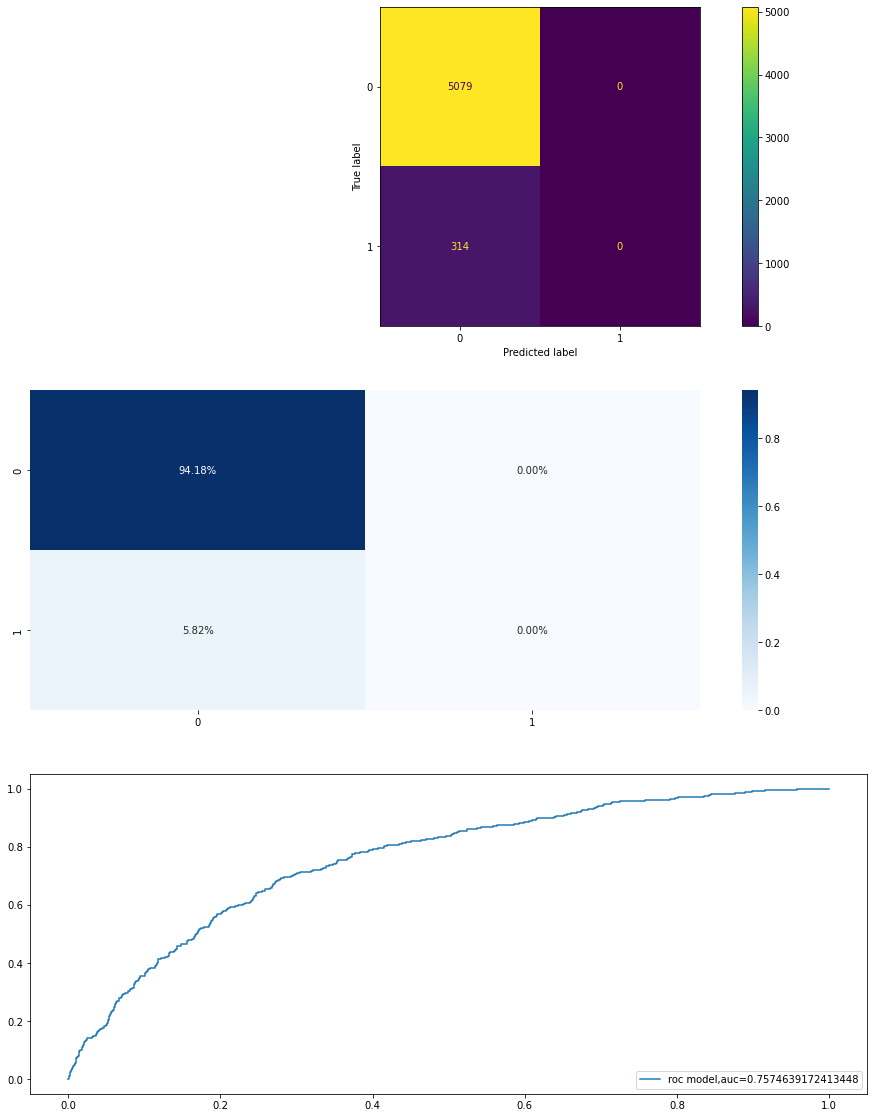


Numerical values sampled with: PowerTransformer
       Reward_Cash Back  Reward_Points  MailerType_Postcard  IncomeLevel_Low  \
0                     0              0                    0                0   
1                     0              0                    0                0   
2                     0              0                    1                0   
3                     0              0                    0                0   
4                     0              0                    0                0   
...                 ...            ...                  ...              ...   
17995                 1              0                    0                0   
17996                 1              0                    0                0   
17997                 1              0                    0                0   
17998                 1              0                    0                0   
17999                 1              0                    0            

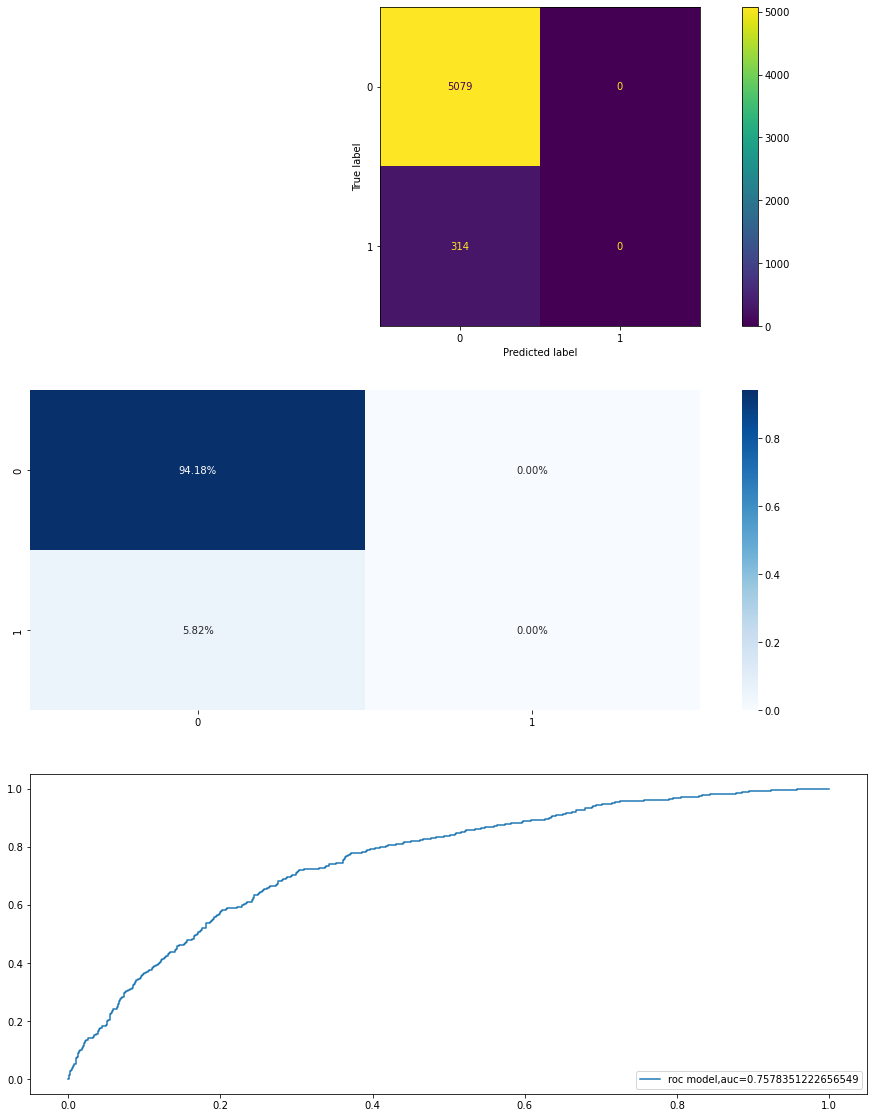

In [31]:
result_fn = fn.logistic_regresion_full (X_full,y,1)

In [32]:
result_fn

,Scaler,Accuracy
0,MinMaxScaler,0.941776
1,MaxAbsScaler,0.941776
2,StandardScaler,0.941776
3,RobustScaler,0.941776
4,Normalizer,0.941776
5,QuantileTransformer,0.941776
6,PowerTransformer,0.941776


## KNN

In [33]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
import seaborn as sns
X_train,X_test,y_train,y_test=train_test_split(X_full,y,test_size=0.30,random_state=40)
Knn=KNeighborsClassifier()
Knn.fit(X_train,y_train)
y_pred=Knn.predict(X_test)
accuracy_score(y_test,y_pred)

KNeighborsClassifier()

0.9404783979232338

In [39]:
y_test.value_counts()

No     5079
Yes     314
Name: OfferAccepted, dtype: int64

In [41]:
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

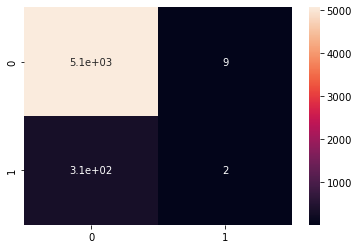

In [35]:
c_m=confusion_matrix(y_test,y_pred)
c_m
sns.heatmap(c_m, annot=True)
plt.show();

array([[5070,    9],
       [ 312,    2]], dtype=int64)

In [ ]:
#Change 3 boolean to 0,1
# data['Offer Accepted'] = data['Offer Accepted'].apply(functions.yes_no_to_0_1)
# data['Overdraft Protection'] = data['Overdraft Protection'].apply(functions.yes_no_to_0_1)
# data['Own Your Home'] = data['Own Your Home'].apply(functions.yes_no_to_0_1)
